# CS:311-Data Mining
# Data Mining Lab Assignment

## Name: Saurabh Chaturvedi
## Exam Roll No: 21419MCA050

### Importing Required Libraries 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import statsmodels.api as sm
import pylab as py
from scipy import stats 
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder 
from IPython.display import Image
#import pyfpgrowth
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Qus-1: Data preprocessing and Visualization for data mining

### Data Preprocessing

Data Preprocessing is a process of converting the raw data into cleaned text. In general preprocessing refers to the transformations applied to the data before feeding into the algorithm. It is merely transforming raw data into an understandable format. It is strongly recommended to understand the Data Description where we can explore the definitions and contents of all the variables before working on ML Algorithm. We have to remember that the quality of input decides the quality of the output. Approximately data preprocessing takes 70% of the total project time which indicates how much preprocessing stage is essential for any ML project. Therefore to avoid misleading results, data has to screened before giving as input to the ML algorithm. In the real world, the data contains noise, missing values, and inconsistent data due to the large size and also, data is gathered from data sets which are present in multiple forms and origin from multiple sources. The output from the preprocessing is the final data set. The methods for data preprocessing are organized into different categories. Let us explore each one individually.

- **Data Integration**

Data Integration is to carefully merge data from multiple sources which helps to reduce and avoid redundancies in the data. For example, the attribute ‘Discount’ in one source is based on the total transaction, and the same attribute ‘Discount’ may be based on individual discounts from another source. Even redundancy and duplication are essential to be considered in data integration. De-duplication is a process which deals with duplicate data.

- **Data Cleaning**

Data Cleaning or Data cleansing is to clean the data by imputing missing values, smoothing noisy data, and identifying or removing outliers. In general, the missing values are found due to collection error or data is corrupted. The missing data can be filled by using various techniques like removing the entire rows which contain missing data or replacing the data with any corresponding value. These techniques are poor when missing values are considerably high. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. We can also use any of the predictive model technique to impute values and choosing the model is purely based on the business goal. For example, we can use KNN imputation which replaces the missing values with most similar to the respective missing values by using distance as a measurement. KNN Imputation is used most often as it is based on the Neighborhood criteria. Another example, i.e. especially for binary classification, we can use class labels to impute missing values which helps to minimize our likelihood error.

To remove the noise, Binning is used to smoothing the sorted data by checking the neighborhood values. Firstly the data is sorted and partition into equal frequency bins. Secondly, various binning techniques like smoothing by bin means, smoothing by bin medians or smoothing by bin boundaries are used. Also, regression and clustering are used to remove the noise.
Outliers are significant to consider as they will reduce the accuracy of the model if we did not address them appropriately. Average Mean is high with outliers, and our estimate may change entirely. We can use various visualization techniques like Box-plot, Scatter-plot, and Histogram to identify the outliers. There is one crucial point to be considered, as noise is not the same as outliers. Noise is garbage and recommended to remove before performing outlier detection. We can conclude less probability that outliers may or may not make model fail while on the other hand, the noise has the high probability our model will fail. One of the technique to detect the outliers is by looking at the range of IQR where the value beyond the rand of -1.5IQR to 1.5IQR.

- **Data Reduction**

Data Reduction strategies are used to reduce the dataset regarding volume without losing its originality. Dimensionality reduction will reduce the no of attribute or variables whereas numerosity reduction will reduce the data volume by smaller forms of data representations. Principle component analysis is one of the widely used dimensionality reduction technique which reduces the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes created are called components which explains the amount of variance captured from the data. Feature subset selection is also another way to reduce the dimensionality of the data.

Also, even sampling can be used as a data reduction technique as it helps to sample the small dataset from the large dataset. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample and Cluster sampling, where entire population is divided into clusters, then simple random sample of clusters is selected from the population and Stratified sampling, where entire population is divided into strata(some common characteristics in the population data), then simple random sample of strata are selected from the population.

- **Data Transformation**

Data Transformation is the process of converting data or information from one format to another which helps to find the patterns or to improve the efficiency of the model or accuracy of the model. Real world data is collected from different sources in different ways and given data might is on different scales. Normalization is one of the data transformation technique where attribute data is scaled to fall within a small range and make all the attributes equal. Column normalization or feature normalization used to transform or compress the data in the range between 0 and 1. Here we are making the scale uniform and compressed the data in the hypercube. Column standardization or feature standardization used a lot in practice which transforms or compress the data such that their mean is 0 and the standard deviation is 1. Here we are compressing or expanding the data points in the hypercube to make our standard deviation for any feature is 1. Also, One hot encoding is the technique which is used to convert categorical variables to numerical variables.


- **Data Aggregation**

Data aggregation is a preprocessing technique to aggregate the data required for the analysis. For example, the sales data is presented for each day, and we would like to analyze by each month. Here we combine each day are grouped by month to find the sales trend. It is used to improve the stability of the data and to understand the granularity, i.e., from fine scale to coarser.

- **Data Discretization**

Data Discretization is one of the other preprocessing technique which reduces the no. of continuous variable values by grouping them into some bins or intervals. In simple words, putting the values into buckets by making them discrete. Discretization performs differently with Supervised and Unsupervised as Class Labels information will help additionally with supervised for discretizing. For example, a set of values like all the different set of students age, are organized in different buckets like young-age, mature-age and old-age.

**For this problem, I have used the titanic dataset.**

In [ ]:
df=pd.read_csv("titanic_dataset.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Names of features or preditors in the dataset 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [ ]:
#cheking rows and columns
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# datatypes of each columns or features
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Numerical columns - PassengerId,Survived,Pclass,Age,Sibsp,Parch,Ticket,Fare.

- Categorial Columns - Name,Sex,cabin,Embarked

In [ ]:
# number of unique values in each columns
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

#### Handling Missing Values

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

There are many ways to handle missing values in the dataset:

- Deleting Rows with missing values
- Impute missing values for continuous variable
- Impute missing values for categorical variable
- Other Imputation Methods
- Using Algorithms that support missing values
- Prediction of missing values
- Imputation using Deep Learning Library — Datawig

**Delete Rows with Missing Values:**

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

- Pros:
A model trained with the removal of all missing values creates a robust model.

- Cons:
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

**Impute missing values with Mean/Median:**

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

- Pros:
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.

- Cons:
Works only with numerical continuous variables.
Can cause data leakage.
Do not factor the covariance between features.


**Imputation method for categorical columns:**

When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

- Pros:
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category.

- Cons:
Works only with categorical variables.
Addition of new features to the model while encoding, which may result in poor performance.



**Using Algorithms that support missing values:**

All the machine learning algorithms don’t support missing values but some ML algorithms are robust to missing values in the dataset. The k-NN algorithm can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction. These algorithms can be used when the dataset contains null or missing values.

The sklearn implementations of naive Bayes and k-Nearest Neighbors in Python do not support the presence of the missing values.

Another algorithm that can be used here is RandomForest that works well on non-linear and categorical data. It adapts to the data structure taking into consideration the high variance or the bias, producing better results on large datasets.

- Pros:
No need to handle missing values in each column as ML algorithms will handle them efficiently.


- Cons:
No implementation of these ML algorithms in the scikit-learn library.


**Prediction of missing values:**

In the earlier methods to handle missing values, we do not use the correlation advantage of the variable containing the missing value and other variables. Using the other features which don’t have nulls can be used to predict missing values.

The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.

- Pros:
Gives a better result than earlier methods
Takes into account the covariance between the missing value column and other columns.

- Cons:
Considered only as a proxy for the true values

In [ ]:
# missing values
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- since this data contains 400 records and cabin has 327 missing values so it's better to drop this columns   

<AxesSubplot:>

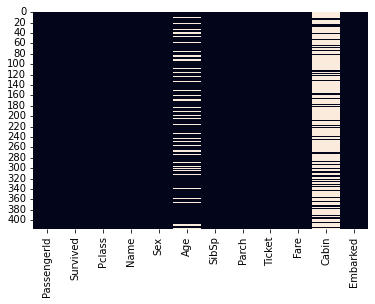

In [ ]:
### Visualizing the missing values using heatmap 
sns.heatmap(df.isnull(),cbar=False)

### Insights
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

In [ ]:
# droping the cabin column since it contains very large number of missing values 
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

For Age columns , we can fill missing values with their mean or median value.

In [ ]:
# filling missing values with its mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
### And, For fair column,simply remove the row with missing values as it contains only one missing values
df=df.dropna()

In [ ]:
df.shape


(417, 11)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

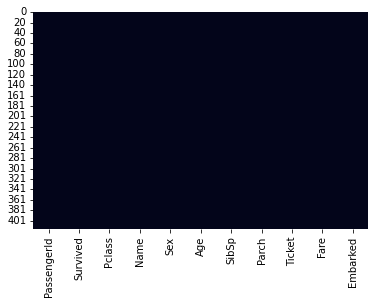

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

### Find the mean, median, mode, max, min, quantiles, outliers, standard deviation and variance of the data**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


###### Mean

In [ ]:
df.mean()

PassengerId    1100.635492
Survived          0.364508
Pclass            2.263789
Age              30.200103
SibSp             0.448441
Parch             0.393285
Fare             35.627188
dtype: float64

###### Median

In [ ]:
df.median()

PassengerId    1101.00000
Survived          0.00000
Pclass            3.00000
Age              30.27259
SibSp             0.00000
Parch             0.00000
Fare             14.45420
dtype: float64

###### Mode

In [ ]:
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0.0,3.0,"Abbott, Master. Eugene Joseph",male,30.27259,0.0,0.0,PC 17608,7.75,S
1,893,NaN,NaN,"Abelseth, Miss. Karen Marie",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,894,NaN,NaN,"Abelseth, Mr. Olaus Jorgensen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,NaN,NaN,"Abrahamsson, Mr. Abraham August Johannes",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,NaN,NaN,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
412,1305,NaN,NaN,"de Brito, Mr. Jose Joaquim",NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,1306,NaN,NaN,"de Messemaeker, Mr. Guillaume Joseph",NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1307,NaN,NaN,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,1308,NaN,NaN,"van Billiard, Master. James William",NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Variance

In [ ]:
df.var()

PassengerId    14622.559122
Survived           0.232199
Pclass             0.709094
Age              157.813531
SibSp              0.805629
Parch              0.965147
Fare            3125.657074
dtype: float64

###### Standard deviation

In [ ]:
df.std()

PassengerId    120.923774
Survived         0.481870
Pclass           0.842077
Age             12.562386
SibSp            0.897568
Parch            0.982419
Fare            55.907576
dtype: float64

###### Maximum values

In [ ]:
df.max()

PassengerId                                 1309
Survived                                       1
Pclass                                         3
Name           van Billiard, Master. Walter John
Sex                                         male
Age                                         76.0
SibSp                                          8
Parch                                          9
Ticket                               W.E.P. 5734
Fare                                    512.3292
Embarked                                       S
dtype: object

###### Minimum

In [ ]:
min = df.min()
min

PassengerId                              892
Survived                                   0
Pclass                                     1
Name           Abbott, Master. Eugene Joseph
Sex                                   female
Age                                     0.17
SibSp                                      0
Parch                                      0
Ticket                                110469
Fare                                     0.0
Embarked                                   C
dtype: object

###### Find the first quartile (Q1), the third quartile (Q3) of the data and Inter-quartile range.

#### Converting categorial features

In [ ]:
df1=df.copy()

In [ ]:
sex = pd.get_dummies(df1['Sex'],drop_first=True)
embark = pd.get_dummies(df1['Embarked'],drop_first=True)

In [ ]:
df1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df1 = pd.concat([df1,sex,embark],axis=1)
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.50000,0,0,7.8292,1,1,0
1,893,1,3,47.00000,1,0,7.0000,0,0,1
2,894,0,2,62.00000,0,0,9.6875,1,1,0
3,895,0,3,27.00000,0,0,8.6625,1,0,1
4,896,1,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,8.0500,1,0,1
414,1306,1,1,39.00000,0,0,108.9000,0,0,0
415,1307,0,3,38.50000,0,0,7.2500,1,0,1
416,1308,0,3,30.27259,0,0,8.0500,1,0,1


In [ ]:
np.quantile(df1, 0.50,axis=0)

array([1.10100000e+03, 0.00000000e+00, 3.00000000e+00, 3.02725904e+01,
       0.00000000e+00, 0.00000000e+00, 1.44542000e+01, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

First Quartile Q1

In [ ]:
q1 = np.quantile(df1, 0.25,axis=0)
q1

array([996.    ,   0.    ,   1.    ,  23.    ,   0.    ,   0.    ,
         7.8958,   0.    ,   0.    ,   0.    ])

Third Quartile Q3

In [ ]:
q3 = np.quantile(df1, 0.75,axis=0)
q3

array([1.205e+03, 1.000e+00, 3.000e+00, 3.500e+01, 1.000e+00, 0.000e+00,
       3.150e+01, 1.000e+00, 0.000e+00, 1.000e+00])

Inter-Quartile Range

In [ ]:
iqr = q3-q1
iqr

array([209.    ,   1.    ,   2.    ,  12.    ,   1.    ,   0.    ,
        23.6042,   1.    ,   0.    ,   1.    ])

#### Five number summary of data

In [ ]:
print("Five number summary of the data")
des=df.describe()
des
des.iloc[3:8,]

Five number summary of the data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,892.0,0.0,1.0,0.17000,0.0,0.0,0.0000
25%,996.0,0.0,1.0,23.00000,0.0,0.0,7.8958
50%,1101.0,0.0,3.0,30.27259,0.0,0.0,14.4542
75%,1205.0,1.0,3.0,35.00000,1.0,0.0,31.5000
max,1309.0,1.0,3.0,76.00000,8.0,9.0,512.3292


### Outlier Detection

- Outliers can be detected using visualization like using box plot and scatter plot, or using Inter-Quartile Range and z-sore(mathematial approach).

**1.Using Box plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb22618700>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb22618ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb22618400>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb22624280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb22624550>],
 'means': []}

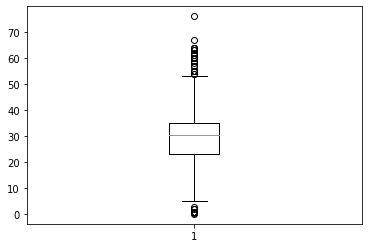

In [ ]:
plt.boxplot(df['Age'])

- In the above graph, it's clearly visible that values above 60 are acting as Outliers.

**2.Using Scatter plot** 

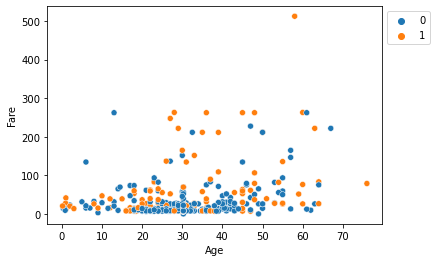

In [ ]:
## scatter plot between Age and PassengerId columns
sns.scatterplot(x='Age', y='Fare',
                hue='Survived', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

- By Looking at the graph we can summarize that most of the data points are in the bottom of the graph and the points that are up-right corners are acting as outliers. 

**.Using Inter-quartile Range**

In [ ]:
# IQR
Q1=np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q3=np.percentile(df['Age'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
IQR

12.0

In [ ]:
# Above Upper bound
upper =(Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(df['Age']>=upper))
 
# Below Lower bound
lower =(Q1-1.5*IQR)
print("Lower bound:",lower)
print(np.where(df['Age']<=lower))

Upper bound: 53.0
(array([  2,  13,  20,  48,  69,  77,  81,  96, 114, 131, 142, 176, 178,
       192, 212, 216, 223, 235, 239, 292, 304, 307, 313, 315, 342, 355,
       373, 377, 386], dtype=int64),)
Lower bound: 5.0
(array([ 89, 117, 200, 249, 262, 280, 283, 295, 306, 353, 378, 408],
      dtype=int64),)


- This points are acting as outliers.

**4.Z-score**

In [ ]:
z = np.abs(stats.zscore(df['Age']))
print(z)

0      0.342695
1      1.338924
2      2.534399
3      0.255043
4      0.653535
         ...   
413    0.005777
414    0.701337
415    0.661488
416    0.005777
417    0.005777
Name: Age, Length: 417, dtype: float64


- To Define an outlier threshold value is hoosen whcih is generally 3. 

In [ ]:
threshold=2.5
# Position of outlier
print(np.where(z>2.5))

(array([  2,  13,  81,  96, 114, 178, 235, 304], dtype=int64),)


- This points are acting as outliers.

### Data Visualization

**Visualization of 'Survived'[Target column]**

In [ ]:
df.Survived.value_counts()

0    265
1    152
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

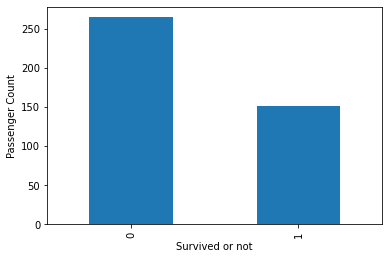

In [ ]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

<AxesSubplot:xlabel='Survived', ylabel='count'>

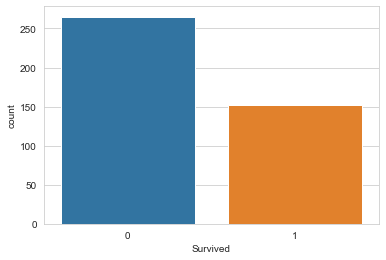

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

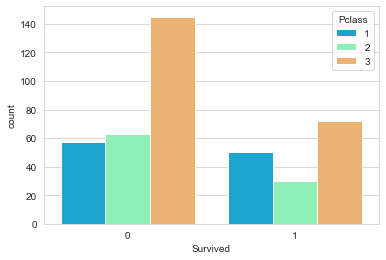

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')


**Plass**
- Majority of them are from 3rd class

Text(0, 0.5, 'Survival Probability')

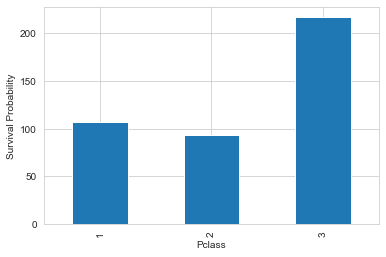

In [ ]:
plt = df.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [ ]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,107
2,93
3,217


In [ ]:
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,50
2,30
3,72


*Plass survival probability*

Text(0, 0.5, 'Survival Probability')

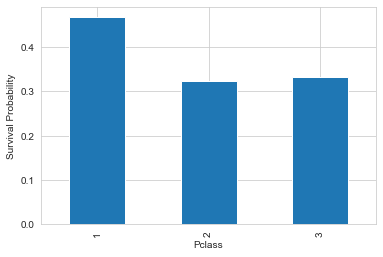

In [ ]:
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

- From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

**Sex**
- majority of them are male

Text(0, 0.5, 'Passenger count')

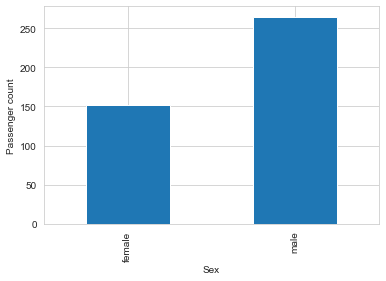

In [ ]:
plt = df.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

*Sex Survival Probability*
- As we see, the survival probaility for Female is more. They might have given more priority to female than male.

Text(0, 0.5, 'Survival Probability')

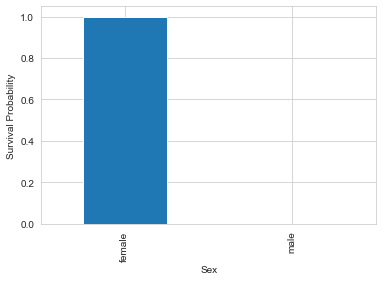

In [ ]:
plt = df[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

**Embarked**
- Most of them are from Southampton(S).

Text(0, 0.5, 'Passenger count')

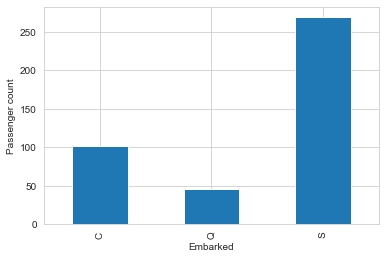

In [ ]:
plt = df.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

**Embarked-Survival Probability**
- Survival probability: C > Q > S

Text(0, 0.5, 'Survival Probability')

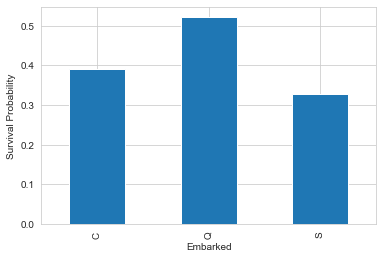

In [ ]:
plt = df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

**Age**

<AxesSubplot:xlabel='Age'>

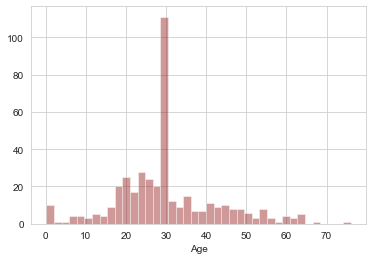

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

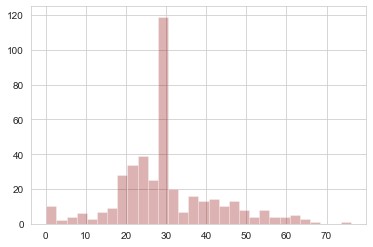

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

**SibSp - Siblings/Spouse**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

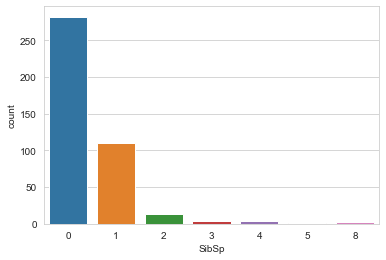

In [ ]:
sns.countplot(x='SibSp',data=df)

**Fare**

<AxesSubplot:>

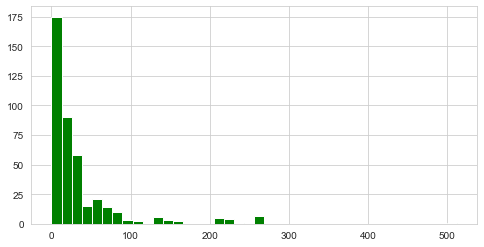

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4),label='Fare')

**Correlation between columns**

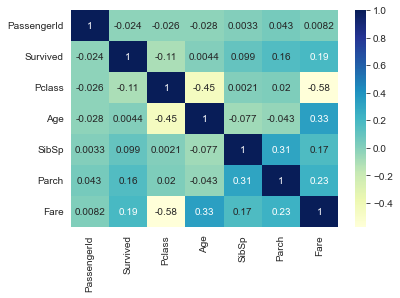

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

- There are no very highly correlated columns.

**Box Plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb22f8d880>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb22f8de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb22f8d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb22f99400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb22f996d0>],
 'means': []}

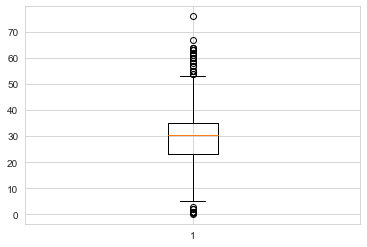

In [ ]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb22fdcac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb22feb0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb22fdc910>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb22feb640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb22feb910>],
 'means': []}

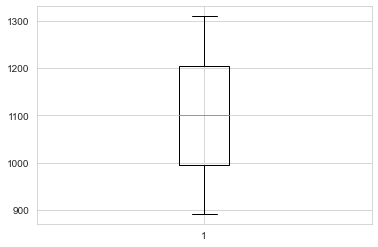

In [ ]:
plt.boxplot(df['PassengerId'])

**Quantile-Quantile plot**

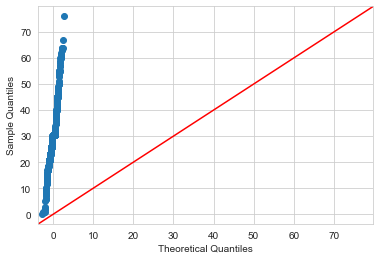

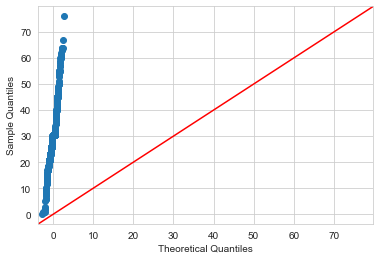

In [ ]:
## Quantile plot
sm.qqplot(df['Age'],line='45')

**Scatter Plot** 

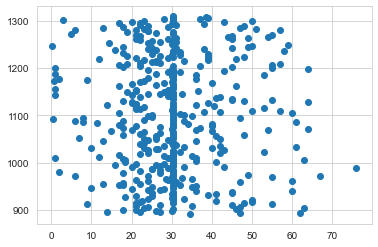

In [ ]:
## scatter plot between Age and PassengerId columns
plt.scatter(df['Age'],df['PassengerId'])

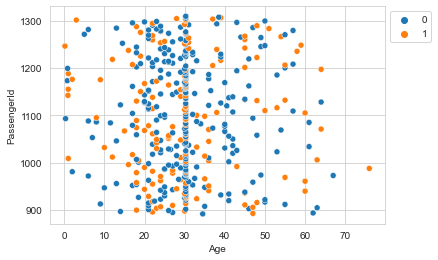

In [ ]:
## scatter plot between Age and PassengerId columns
sns.scatterplot(x='Age', y='PassengerId',
                hue='Survived', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

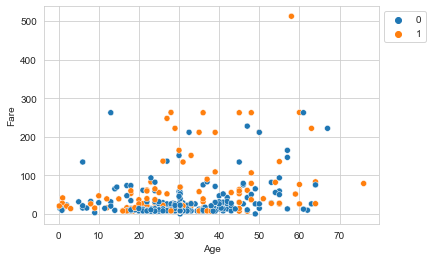

In [ ]:
## scatter plot between Age and Fare columns
sns.scatterplot(x='Age', y='Fare',
                hue='Survived', data=df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

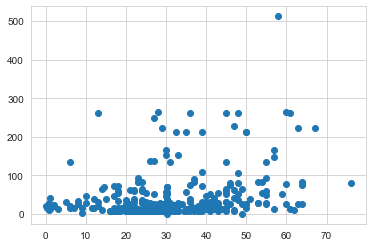

In [ ]:
## scatter plot between Age and Fare columns
plt.scatter(df['Age'],df['Fare'])

## Qus.2 : Implementation of Apriori algorithm for finding Frequent Itemsets and Association Rules.

**What is Association Rule Learning?**

Association Rule Learning is rule-based learning for identifying the association between different variables in a database. One of the best and most popular examples of Association Rule Learning is the Market Basket Analysis. The problem analyses the association between various items that has the highest probability of being bought together by a customer.

For example, the association rule, {onions, chicken masala} => {chicken} says that a person who has got both onions and chicken masala in his or her basket has a high probability of buying chicken also.

**Apriori Algorithm**

The algorithm was first proposed in 1994 by Rakesh Agrawal and Ramakrishnan Srikant. Apriori algorithm finds the most frequent itemsets or elements in a transaction database and identifies association rules between the items just like the above-mentioned example.

**How Apriori works ?**

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:


- **Support:**

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions.
Support indicates how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.


- **Confidence:**

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.
Confidence says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

- One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

**Lift:**

Lift is the ratio between the confidence and support.
Lift says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

- For this Question, I have used the bakery data with the list of items bought by customers.
- And, By using Apriori Algorithm, I will try to find the frequent itemsets and Association rules between the items which are mostly buy together by the customers

In [ ]:
bakery_data=pd.read_csv("breadbasket_dataset.csv",encoding='utf-8-sig')

In [ ]:
bakery_data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
bakery_data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [ ]:
bakery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
 bakery_data.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

- There is no missing value in the data.

In [ ]:
bakery_data.nunique()

Transaction        9465
Item                 94
date_time          9182
period_day            4
weekday_weekend       2
dtype: int64

In [ ]:
bakery_data['Transaction'].nunique()

9465

- There are 9465 unique customers.

In [ ]:
# Extracting date
bakery_data['date'] = pd.to_datetime(bakery_data['date_time'],errors='coerce')

In [ ]:
# Extracting time
bakery_data['time'] = bakery_data['date'].dt.time

In [ ]:
# Extracting month and replacing it with text
bakery_data['month'] = bakery_data['date'].dt.month
bakery_data['month'] = bakery_data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [ ]:
# Extracting hour
bakery_data['hour'] = bakery_data['date'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
bakery_data['hour'] = bakery_data['hour'].replace(hour_in_num, hour_in_obj)

In [ ]:
# Extracting weekday and replacing it with text
bakery_data['weekday'] = bakery_data['date'].dt.weekday
bakery_data['weekday'] = bakery_data['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))


In [ ]:
# dropping date_time column
bakery_data.drop('date_time', axis = 1, inplace = True)

In [ ]:
bakery_data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30 09:58:00,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday


In [ ]:
# cleaning the item column
bakery_data['Item'] = bakery_data['Item'].str.strip()
bakery_data['Item'] = bakery_data['Item'].str.lower()

In [ ]:
bakery_data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30 09:58:00,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday


### Data Visualization

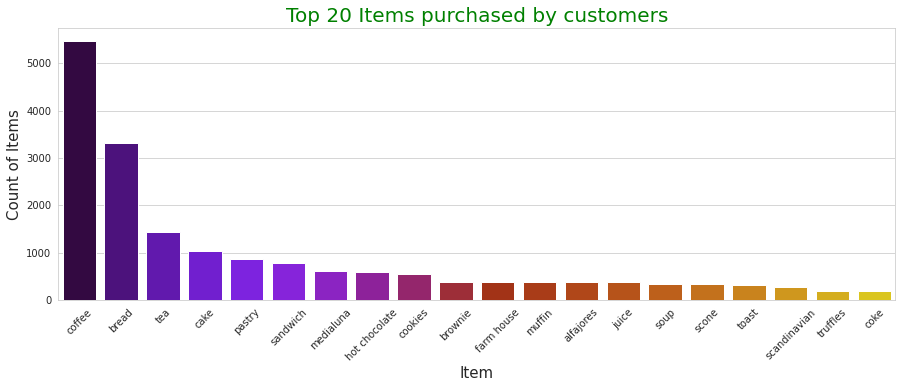

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = bakery_data.Item.value_counts().head(20).index, y = bakery_data.Item.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Item', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

- Coffee has the highest transactions.
- Coke is the 20th most buyed product.

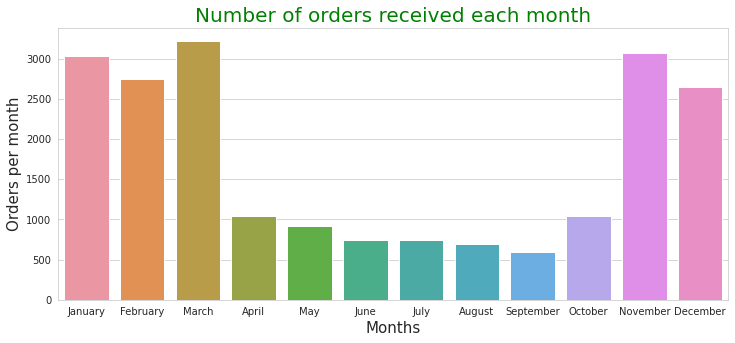

In [ ]:
monthTran = bakery_data.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

- Most transactions were in **March, January, February, November, December**

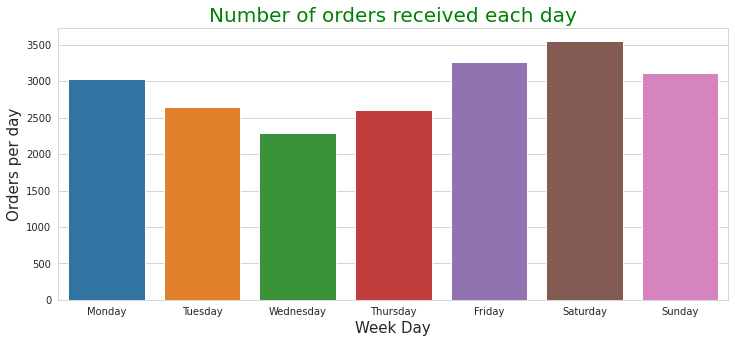

In [ ]:
weekTran = bakery_data.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

People order more on weekends.


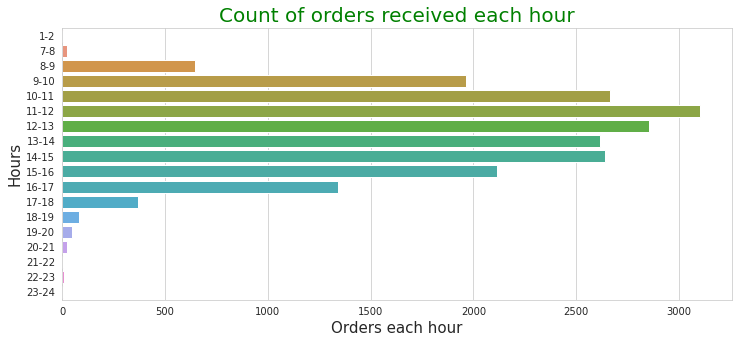

In [ ]:
hourTran = bakery_data.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

People order more during the afternoon, since there are a lot of maximum order percentage between 12-5.

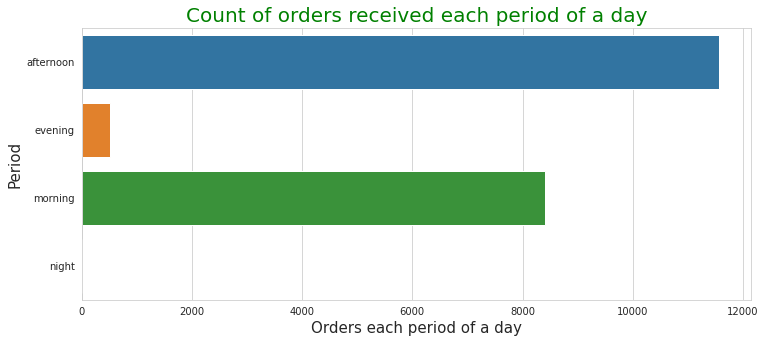

In [ ]:
dayTran = bakery_data.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

People prefer to order in the morning and afternoon.

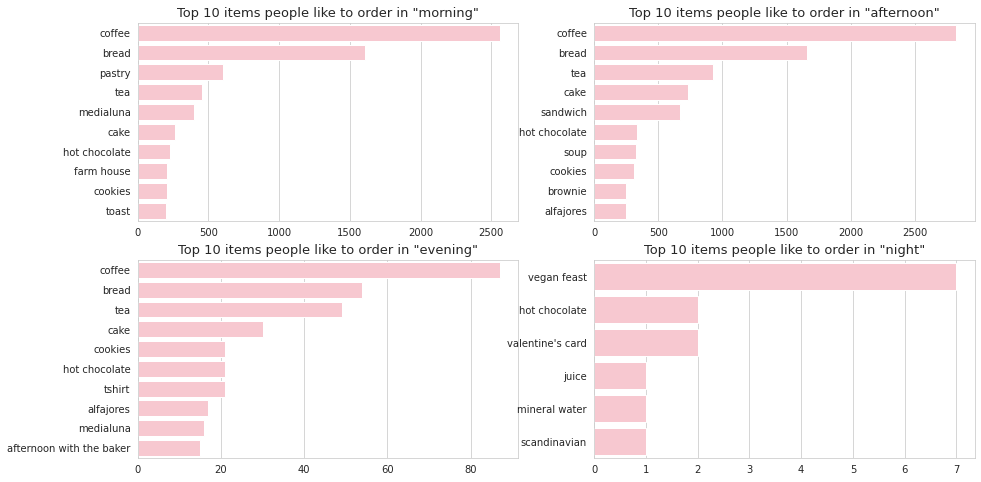

In [ ]:
data = bakery_data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()


### Apriori Algorithm

In [ ]:
transactions_str = bakery_data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


- *Making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not*

In [ ]:
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- making a function which returns 0 or 1
- 0 means item was not in that transaction, 1 means item present in that transaction

In [ ]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **Generating frequent_item sets with min_support=0.01**

 Using the 'apriori algorithm' with **min_support=0.01 (1% of 9465)**
 It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
 frequent itemset

In [ ]:
frequent_items1 = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items1

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(bread, coffee, cake)"
59,0.011199,"(bread, coffee, pastry)"


- **Generating Association Rules from Frequent Itemsets-1.**

now making the rules from frequent itemset generated above

In [ ]:
rules1 = association_rules(frequent_items1, metric = "lift", min_threshold = 1)
rules1.sort_values('confidence', ascending = False, inplace = True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


- **Arranging the data from highest to lowest with respect to 'confidence' for Frequent Itemset-1**

In [ ]:
rules1.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


- **Generating frequent_item sets with min_support=0.02**

In [ ]:
frequent_items2 = apriori(my_basket_sets, min_support = 0.02,use_colnames = True)
frequent_items2

,support,itemsets
0,0.036344,(alfajores)
1,0.327205,(bread)
2,0.040042,(brownie)
3,0.103856,(cake)
4,0.478394,(coffee)
5,0.054411,(cookies)
6,0.039197,(farm house)
7,0.058320,(hot chocolate)
8,0.038563,(juice)
9,0.061807,(medialuna)


- **Generating Association Rules from Frequent Itemsets-1.**

In [ ]:
rules2 = association_rules(frequent_items2, metric = "lift", min_threshold = 1)
rules2.sort_values('confidence', ascending = False, inplace = True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
13,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
15,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
11,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
17,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
8,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
1,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865


- **Arranging the data from highest to lowest with respect to 'confidence' for Frequent Itemset-2**

In [ ]:
rules2.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
13,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
15,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
11,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
17,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
8,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
1,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865


## Qus-3: Implementation of FP-growth algorithm for finding Frequent Itemsets and Association Rules

The FP-Growth Algorithm proposed by Han in. This is an efficient and scalable method for mining the complete set of frequent patterns by pattern fragment growth, using an extended prefix-tree structure for storing compressed and crucial information about frequent patterns named frequent-pattern tree (FP-tree). In his study, Han proved that his method outperforms other popular methods for mining frequent patterns, e.g. the Apriori Algorithm and the TreeProjection. In some later works, it was proved that FP-Growth performs better than other methods, including Eclat and Relim. The popularity and efficiency of the FP-Growth Algorithm contribute to many studies that propose variations to improve its performance.

**What is FP Growth Algorithm?**

The FP-Growth Algorithm is an alternative way to find frequent item sets without using candidate generations, thus improving performance. For so much, it uses a divide-and-conquer strategy. The core of this method is the usage of a special data structure named frequent-pattern tree (FP-tree), which retains the item set association information.

- This algorithm works as follows:

1. First, it compresses the input database creating an FP-tree instance to represent frequent items.

2. After this first step, it divides the compressed database into a set of conditional databases, each associated with one frequent pattern.

3. Finally, each such database is mined separately.

Using this strategy, the FP-Growth reduces the search costs by recursively looking for short patterns and then concatenating them into the long frequent patterns.

In large databases, holding the FP tree in the main memory is impossible. A strategy to cope with this problem is to partition the database into a set of smaller databases (called projected databases) and then construct an FP-tree from each of these smaller databases.

**FP-Tree**

The frequent-pattern tree (FP-tree) is a compact data structure that stores quantitative information about frequent patterns in a database. Each transaction is read and then mapped onto a path in the FP-tree. This is done until all transactions have been read. Different transactions with common subsets allow the tree to remain compact because their paths overlap.

A frequent Pattern Tree is made with the initial item sets of the database. The purpose of the FP tree is to mine the most frequent pattern. Each node of the FP tree represents an item of the item set.

The root node represents null, while the lower nodes represent the item sets. The associations of the nodes with the lower nodes, that is, the item sets with the other item sets, are maintained while forming the tree.

Han defines the FP-tree as the tree structure given below:

1. One root is labelled as "null" with a set of item-prefix subtrees as children and a frequent-item-header table.

2. Each node in the item-prefix subtree consists of three fields:
  - Item-name: registers which item is represented by the node;
  - Count: the number of transactions represented by the portion of the path reaching the node;
  - Node-link: links to the next node in the FP-tree carrying the same item name or null if there is none.
3. Each entry in the frequent-item-header table consists of two fields:
  - Item-name: as the same to the node;
  - Head of node-link: a pointer to the first node in the FP-tree carrying the item name.

**For this problem, I will use the same bakery datasets that I have used in the previous question and will try to find the frequent itemsets and Assoiations rules between the items that are mostly buys together by the customers USING FP-Growth algorithm. And, also the data preprocessing is already being done above** 

- After doing Data Preproessing and EDA on the bakery dataset, we now have data bakery_data

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
bakery_data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30 09:58:00,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30 10:05:00,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30 10:07:00,10:07:00,October,10-11,Sunday


In [ ]:
transactions = bakery_data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


- Making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not

In [ ]:
mybasket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

mybasket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- making a function which returns 0 or 1
- 0 means item was not in that transaction, 1 means item present in that transaction

In [ ]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **Generating frequent_item sets with min_support=0.03**

In [ ]:
freq_item = fpgrowth(my_basket_sets,min_support=0.03,use_colnames = True)
freq_item

,support,itemsets
0,0.327205,(bread)
1,0.058320,(hot chocolate)
2,0.054411,(cookies)
3,0.038457,(muffin)
4,0.478394,(coffee)
5,0.086107,(pastry)
6,0.061807,(medialuna)
7,0.142631,(tea)
8,0.039197,(farm house)
9,0.038563,(juice)


In [ ]:
rules_1 = association_rules(freq_item, metric = "lift", min_threshold = 1)
rules_1.sort_values('confidence', ascending = False, inplace = True)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
1,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
5,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
4,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
0,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
6,(coffee),(sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
2,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667


- **Arranging the data from highest to lowest with respect to 'confidence'**

In [ ]:
rules_1.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
1,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
5,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
4,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
0,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
6,(coffee),(sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
2,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667


# Qus-4: Construct the decision tree using CART algorithm and evaluate the performance.

### Decision Tree algorithm

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

  1. At the beginning, the whole training set is considered as the root.
  2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
  3. Records are distributed recursively on the basis of attribute values.
  4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


### Classification and Regression Trees (CART)

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this question, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.

#### Decision Tree algorithm terminology

- In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

- We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

**Root Node**
It represents the entire population or sample. This further gets divided into two or more homogeneous sets.

**Splitting**
It is a process of dividing a node into two or more sub-nodes.

**Decision Node**
When a sub-node splits into further sub-nodes, then it is called a decision node.

**Leaf/Terminal Node**
Nodes that do not split are called Leaf or Terminal nodes.

**Pruning**
When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.

**Branch/Sub-Tree**
A sub-section of an entire tree is called a branch or sub-tree.

**Parent and Child Node**
A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.


#### Decision Tree algorithm intuition

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-

  1. For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

  2. For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

  3. This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

### Attribute selection measures 

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

   - **Information gain**

   - **Gini index**

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

- **Information gain**

By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

**Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

- **Gini index**

Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

   1. Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

   2. Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

In [2]:
car_df=pd.read_csv("car_evaluation_dataset.csv")

In [3]:
car_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
car_df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
car_df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


*Renaming the columns*

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


car_df.columns = col_names

car_df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
car_df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [10]:
car_df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

- We can see that there are no missing values in the dataset.

*Frequency distribution of values in variable*
- frequency counts of categorical variables.

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(car_df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


- We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

**Summary of variables**
- There are 7 variables in the dataset. All the variables are of categorical data type.
- These are given by buying, maint, doors, persons, lug_boot, safety and class.
- class is the target variable.

In [12]:
car_df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

**Data Visualization**

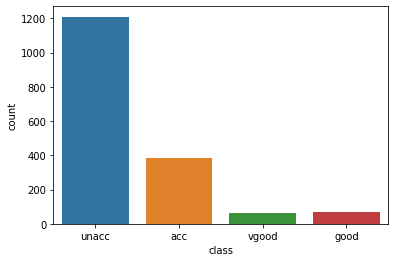

In [13]:
sns.countplot(x='class', data=car_df, )
plt.show()

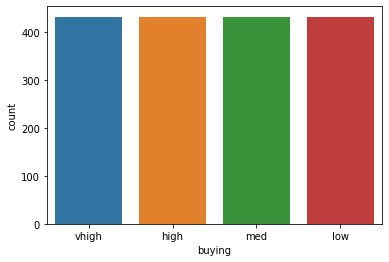

In [14]:
sns.countplot(x='buying', data=car_df, )
plt.show()

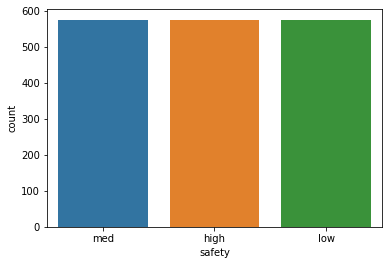

In [15]:
sns.countplot(x='safety', data=car_df, )
plt.show()

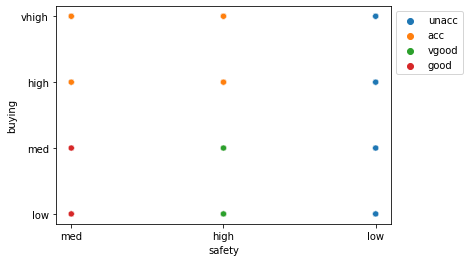

In [16]:
sns.scatterplot(x='safety', y='buying',
                hue='class', data=car_df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

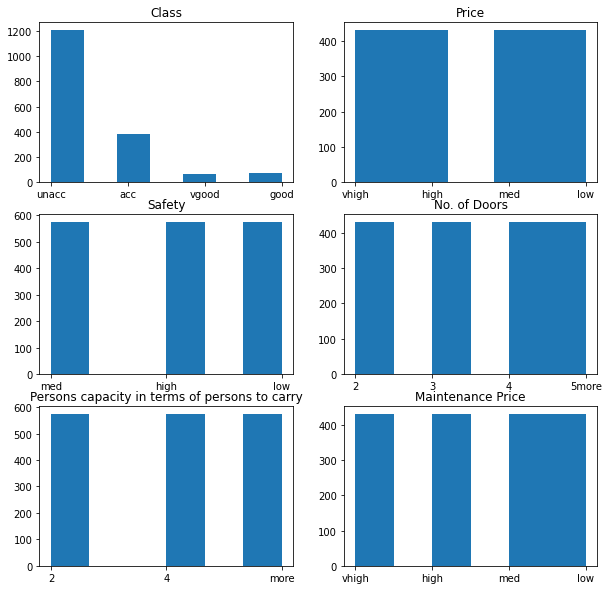

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
  
axes[0,0].set_title("Class")
axes[0,0].hist(car_df['class'], bins=7)
  
axes[0,1].set_title("Price")
axes[0,1].hist(car_df['buying'], bins=5);
  
axes[1,0].set_title("Safety")
axes[1,0].hist(car_df['safety'], bins=6);
  
axes[1,1].set_title("No. of Doors")
axes[1,1].hist(car_df['doors'], bins=6);

axes[2,0].set_title("Persons capacity in terms of persons to carry")
axes[2,0].hist(car_df['persons'], bins=6);

axes[2,1].set_title("Maintenance Price")
axes[2,1].hist(car_df['maint'], bins=6);


- Target Variable

In [18]:
X = car_df.drop(['class'], axis=1)

y = car_df['class']


In [19]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

- split X and y into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [22]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

**Encode categorical variables**

In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [25]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.8 MB/s 


In [26]:
import category_encoders as ce

In [27]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [29]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


### Decision Tree Classifier with criterion gini index(CART Algorithm)

In [30]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [31]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Prediction on the Test data**

In [32]:
y_pred_gini = clf_gini.predict(X_test)

- Check accuracy score with criterion gini index

In [33]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy**


In [34]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

### Visualizing the constructed decision tree

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

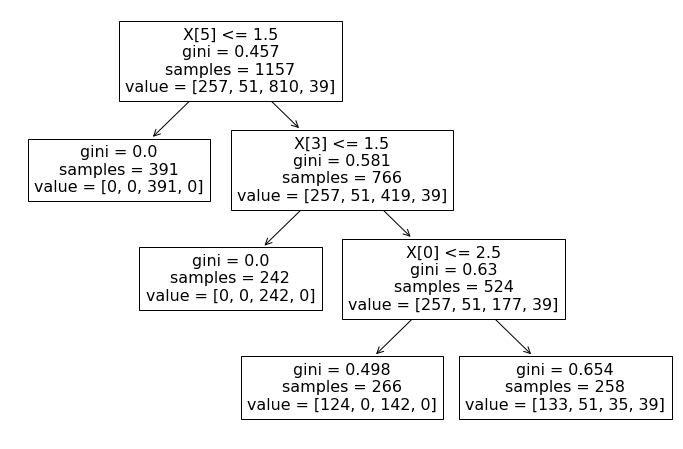

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

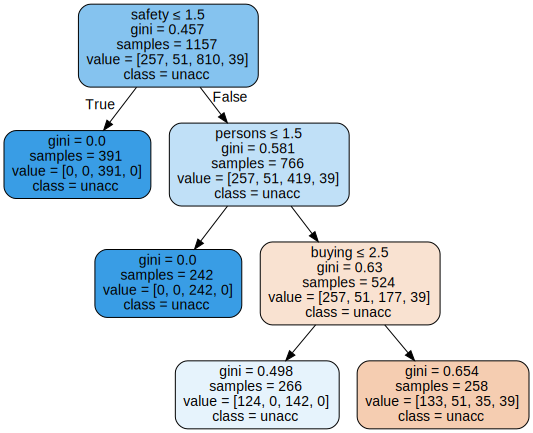

In [52]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

- **Extract rules form the constructed tree**

In [38]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [39]:
from sklearn.tree import export_text

In [40]:
tree_rules = export_text(clf_gini, feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
print(tree_rules)

|--- safety <= 1.50
|   |--- class: unacc
|--- safety >  1.50
|   |--- persons <= 1.50
|   |   |--- class: unacc
|   |--- persons >  1.50
|   |   |--- buying <= 2.50
|   |   |   |--- class: unacc
|   |   |--- buying >  2.50
|   |   |   |--- class: acc



### Decision Tree Classifier with criterion entropy

In [41]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:
#Prediction
y_pred_en = clf_en.predict(X_test)

In [43]:
# Checking Accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


**Compare the train-set and test-set accuracy**

In [44]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


**Check for overfitting and underfitting**

In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

- **Visualizing the constructed decision tree**

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

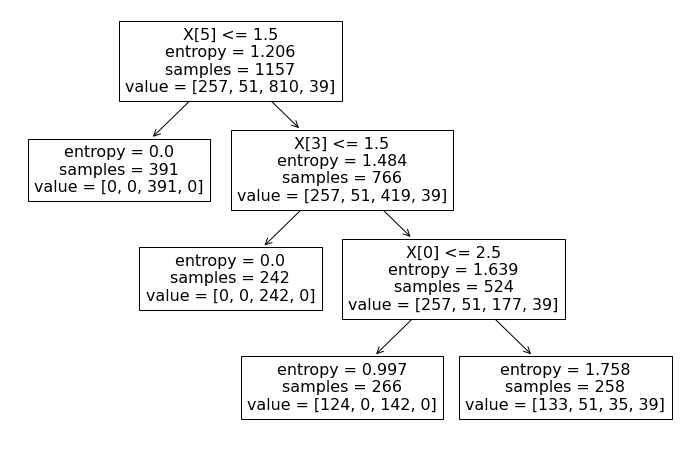

In [47]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

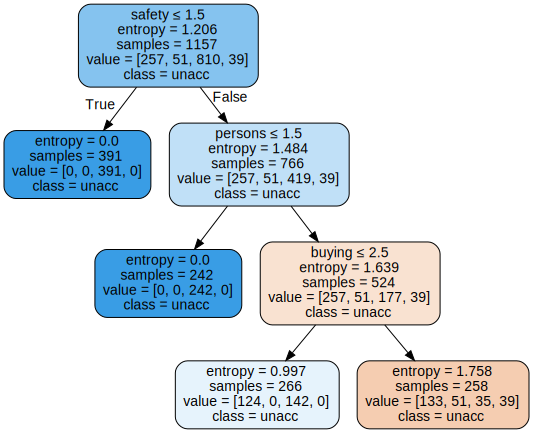

In [48]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

- **Extract rules form the constructed tree**

In [49]:
tree_rules = export_text(clf_en, feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
print(tree_rules)

|--- safety <= 1.50
|   |--- class: unacc
|--- safety >  1.50
|   |--- persons <= 1.50
|   |   |--- class: unacc
|   |--- persons >  1.50
|   |   |--- buying <= 2.50
|   |   |   |--- class: unacc
|   |   |--- buying >  2.50
|   |   |   |--- class: acc



### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [50]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


**Classification Report**

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



## Qus:5- Construct the decision tree using C4.5 algorithm and evaluate the performance.


**C4.5 algorithm** is improvement over ID3 algorithm, where “C” is shows algorithm is written in C and 4.5 specifics version of algorithm. splitting criterion used by C4.5 is the normalized information gain (difference in entropy). The attribute with the highest normalized information gain is chosen to make the decision. The C4.5 algorithm then recurse on the partitioned sub lists.

**Algorithm**

This algorithm has a few base cases.

All the samples in the list belong to the same class. When this happens, it simply creates a leaf node for the decision tree saying to choose that class.

None of the features provide any information gain. In this case, C4.5 creates a decision node higher up the tree using the expected value of the class.

Instance of previously-unseen class encountered. Again, C4.5 creates a decision node higher up the tree using the expected value.

**Steps in algorithm:**

· Check for the above base cases.

· For each attribute a, find the normalized information gain ratio from splitting on a.

· Let a_best be the attribute with the highest normalized information gain.

· Create a decision node that splits on a_best.

· Recurse on the sublists obtained by splitting on a_best, and add those nodes as children of node.

In [56]:
#pip install chefboost

In [55]:
from chefboost import Chefboost as chef

In [57]:
df5=pd.read_csv("/content/car_evaluation_dataset.csv")

In [58]:
df5.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [59]:
df5.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [60]:
df5.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [61]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Renaming the columns

In [62]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df5.columns = col_names

df5.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [63]:
df5.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [ ]:
df5.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [64]:
  X = df5.drop(['class'], axis=1)

y = df5['class']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [66]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [67]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [68]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


- **Encode categorical variables**

In [71]:
import category_encoders as ce

In [72]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)



In [73]:
config = {'algorithm':'C4.5'}

In [74]:
#model = chef.fit(X_train,config,y_train)

In [75]:
# instantiate the DecisionTreeClassifier model with criterion entropy

chef = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
chef.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [76]:
#Prediction
y_pred_en = chef.predict(X_test)

In [77]:
# Checking Accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


In [78]:
y_pred_train_en = chef.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [79]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

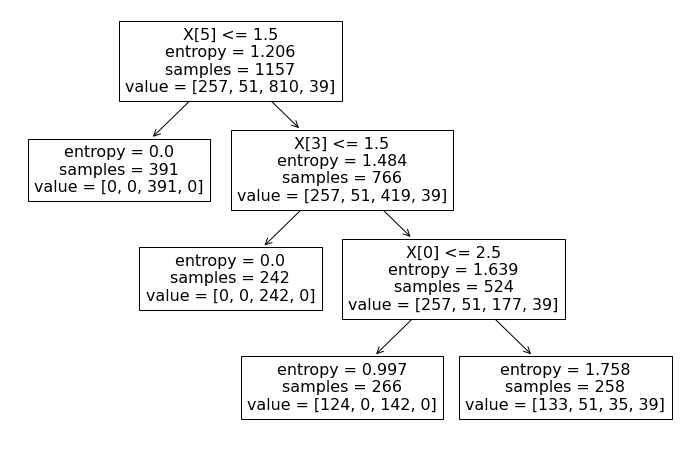

In [80]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(chef.fit(X_train, y_train)) 

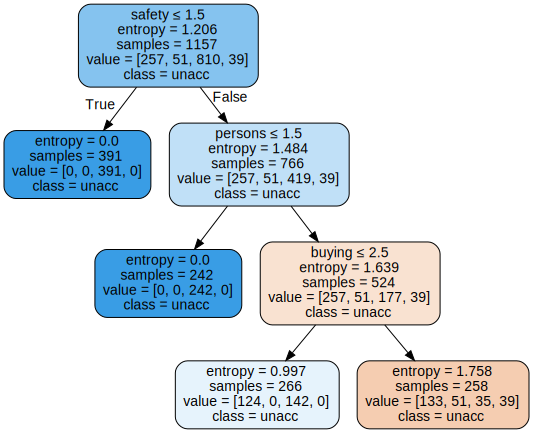

In [81]:
import graphviz 
dot_data = tree.export_graphviz(chef, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

## Qus-6: Construct the naïve bayes classifier and KNN classifiers and classify the given data sample.


 ## Naive Bayes algorithm 

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

**Naive Bayes algorithm intuition**

Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**.

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.

## k Nearest Neighbours algorithm

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

- In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

- In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.

kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.

### k Nearest Neighbours intuition 

The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.

**How to decide the number of neighbours in kNN**

While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
data=pd.read_csv("heart_data.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

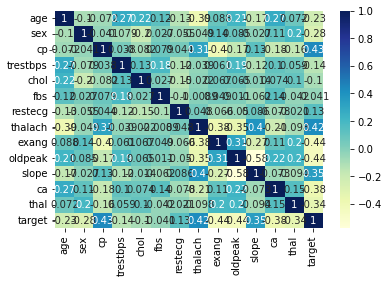

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
print(y_test.unique())
#Counter(y_train)

[1 0]


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **Naive Bayes Classifier**

In [ ]:
## Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
## Prediction
nbpred = nb.predict(X_test)
print(nbpred)

[1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_conf_matrix
print("Confusion Matrix:")
print(nb_conf_matrix)

Confusion Matrix:
[[79 19]
 [11 96]]


In [ ]:
## Accuracy
nb_acc_score = accuracy_score(y_test, nbpred)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

Accuracy of Naive Bayes model: 85.36585365853658 



In [ ]:
print(classification_report(y_test,nbpred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



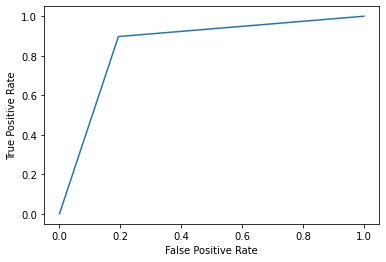

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  nbpred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#calculating accuracy of naiye bayes model using cross validation

scores = cross_val_score(estimator = nb, X= X_test, y= y_test, cv=10, scoring="accuracy")
print("10 fold cross validation scores:",scores)
meanScore = scores.mean()
print("Accuracy of naiye bayes model on test data using cross validation:",meanScore * 100)

10 fold cross validation scores: [0.80952381 0.95238095 0.80952381 0.71428571 0.76190476 0.85
 0.7        0.95       0.9        0.95      ]
Accuracy of naiye bayes model on test data using cross validation: 83.97619047619047


- **K-Nearest Neighbour Classifier**

In [ ]:
final_scores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 100

 CV accuracy for k=2 is 99

 CV accuracy for k=3 is 98

 CV accuracy for k=4 is 93

 CV accuracy for k=5 is 88

 CV accuracy for k=6 is 88

 CV accuracy for k=7 is 84

 CV accuracy for k=8 is 87

 CV accuracy for k=9 is 88


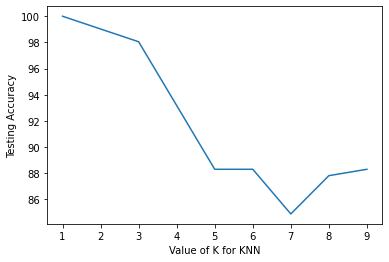

In [ ]:
#using elbow method for calculating optimal value of K 
k_range =range(1,10)
k_values= pd.DataFrame({"Value of K": k_range,"Accuracy":final_scores})
plt.plot(k_range, final_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
#prediction with optimal value of K
optimal_k = final_scores.index(max(final_scores))
print(optimal_k+1)

1


In [ ]:
# Fitting K-NN to the Training set 
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 3,metric = 'euclidean', p = 2) 
classifier.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# Predicting the Test set results 
knnpred = classifier.predict(X_test) 
print(knnpred)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


In [ ]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, knnpred) 
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[ 96   2]
 [  2 105]]


In [ ]:
# Making the Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.98      0.98      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



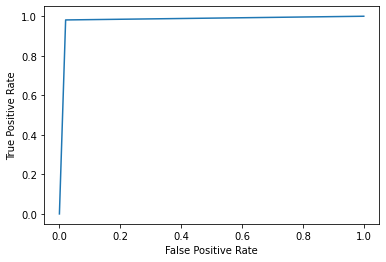

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  knnpred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Qus-7: Implementation of K-Means and K-Medoids.


## **K-Means Clustering**

K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

**K-Means Clustering intuition**

K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.

**Centroid** - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

- Data assignment step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

- Centroid update step

In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.

The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

**Choosing the value of K**

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the **elbow method**.

## K-Medoids Clustering

K-Medoids (also called Partitioning Around Medoid) algorithm was proposed in 1987 by Kaufman and Rousseeuw. A medoid can be defined as the point in the cluster, whose dissimilarities with all the other points in the cluster are minimum. The dissimilarity of the medoid(Ci) and object(Pi) is calculated by using E = |Pi – Ci|.

**Algorithm:**

  1. Initialize: select k random points out of the n data points as the medoids.
  2. Associate each data point to the closest medoid by using any common distance metric methods.
  3. While the cost decreases: For each medoid m, for each data o point which is not a medoid: 
     - Swap m and o, associate each data point to the closest medoid, recompute the cost. 
     - If the total cost is more than that in the previous step, undo the swap.

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [ ]:
df7=pd.read_csv("Live_data.csv")
df7.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df7.shape

(7050, 16)

In [ ]:
df7.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [ ]:
df7.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
df7.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [ ]:
df7.isna().sum()


status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
## Drop the redundant columns
df7.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [ ]:
df7.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

We can see that there are 6997 unique labels in the status_id variable and 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this are not a variable that we can use. Hence, I will drop it.

Since there are only 4 unique labels in the status_type variable so I will use this variable.

In [ ]:
df7.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df7.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


- **Declare feature vector and target variable**

In [ ]:
X = df7

y = df7['status_type']

- **Convert categorical variable into integers**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


- **Feature Scaling**

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### Clustering using K-Means

- **K-Means model with two clusters**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
##K-Means model parameters study
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster **centroids**.
- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

**Inertia**
- Inertia is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [ ]:
kmeans.inertia_

237.75726404419646

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [ ]:
## Check quality of weak classification by the model 
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


We have achieved a weak classification accuracy of 1% by our unsupervised model.

- **Use elbow method to find optimal number of clusters**

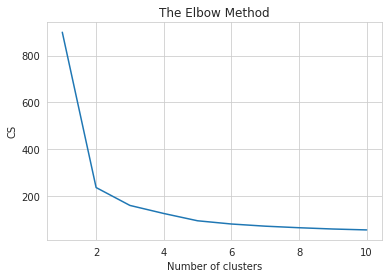

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- **K-Means model with 4 clusters**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


We have achieved a good classification accuracy of 62% by our unsupervised model.

### Clustering using K-Medoids

In [ ]:
kmedoids = KMedoids(n_clusters=1, random_state=0) 

kmedoids.fit(X)

KMedoids(n_clusters=1, random_state=0)

In [ ]:
##K-Medoids model parameters study
kmedoids.cluster_centers_

array([[3.33333333e-01, 8.06794055e-03, 2.85850405e-04, 2.92056075e-04,
        8.06794055e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
kmedoids.inertia_

2026.5971087442226

In [ ]:
## Check quality of weak classification by the model 
labels = kmedoids.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


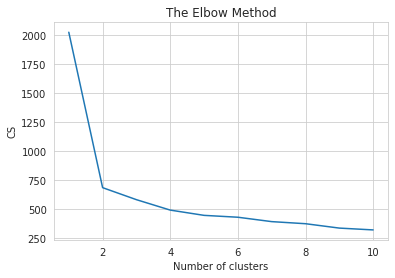

In [ ]:
cs=[]
for i in range(1,11):
    kmedoids=KMedoids(n_clusters=i,init = "k-medoids++" ,max_iter = 300, random_state=0)
    kmedoids.fit(X)
    cs.append(kmedoids.inertia_)
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- By the above plot, we can see that there is a kink at k=2.

- Hence k=2 can be considered a good number of the cluster to cluster this data.

In [ ]:
kmedoids = KMedoids(n_clusters=2, random_state=0) 

kmedoids.fit(X)

KMedoids(n_clusters=2, random_state=0)

In [ ]:
kmedoids.cluster_centers_

array([[1.00000000e+00, 2.84501062e-02, 8.14673654e-03, 1.19742991e-02,
        2.46284501e-02, 2.73972603e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 6.79405520e-03, 1.90566937e-04, 0.00000000e+00,
        6.79405520e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
kmedoids.inertia_

685.6731612861046

In [ ]:
## Check quality of weak classification by the model 
labels = kmedoids.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


## Qus-8 Implementation of EM and Density Based clustering methods.


**What is Density-based clustering?**

Density-Based Clustering refers to one of the most popular unsupervised learning methodologies used in model building and machine learning algorithms. The data points in the region separated by two clusters of low point density are considered as noise. The surroundings with a radius ε of a given object are known as the ε neighborhood of the object. If the ε neighborhood of the object comprises at least a minimum number, MinPts of objects, then it is called a core object.

**Expectation-Maximization (EM) Algorithm**

The Expectation-Maximization (EM) algorithm is an iterative way to find maximum-likelihood estimates for model parameters when the data is incomplete or has some missing data points or has some hidden variables. EM chooses some random values for the missing data points and estimates a new set of data. These new values are then recursively used to estimate a better first date, by filling up missing points, until the values get fixed. 

These are the two basic steps of the EM algorithm, namely **E Step or Expectation Step or Estimation Step** and **M Step or Maximization Step**.

**Gaussian Mixture Model**

Suppose there are K clusters (For the sake of simplicity here it is assumed that the number of clusters is known and it is K). So \mu     and \Sigma     is also estimated for each k. Had it been only one distribution, they would have been estimated by the maximum-likelihood method. But since there are K such clusters and the probability density is defined as a linear function of densities of all these K distributions

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df8 = pd.read_csv("Mall_Customers.csv")

In [ ]:
df8.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df8.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df8.shape

(200, 5)

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df8.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df8.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# subset with numeric variables only, we will not use the Gender for clustering
X_numerics = df8[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

- **Expectation Maximization (EM) algorithm - Gaussian Mixture Model**

In [ ]:
from sklearn.mixture import GaussianMixture 

In [ ]:
X = df8[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
d = pd.DataFrame(X)

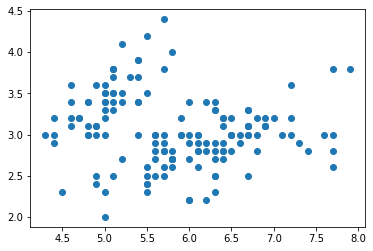

In [ ]:
# plot the data
plt.scatter(d[0], d[1])

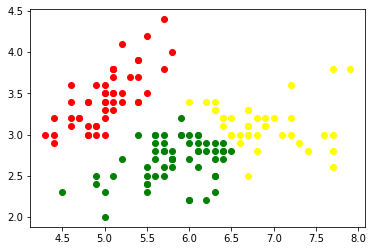

In [ ]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


- **DBSCAN-Density Based clustering**

In DBSCAN there are two major hyperparameters:

- eps
- min_samples

It is difficult arbitrarily to say what values will work the best. Therefore, I will first create a matrix of investigated combinations.

In [ ]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

Because DBSCAN creates clusters itself based on those two parameters let's check the number of generated clusters.

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.

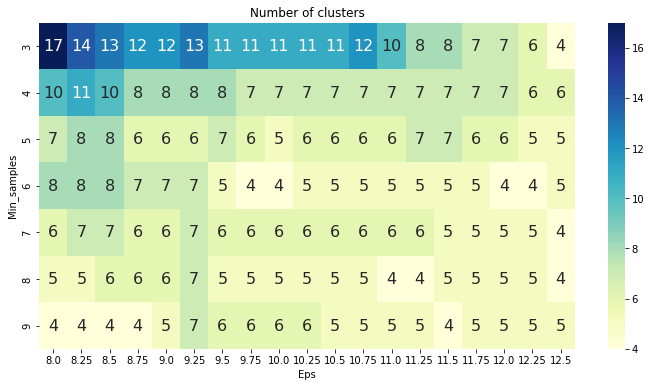

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. To decide which combination to choose I will use a metric - a silhuette score and I will plot it as a heatmap again.

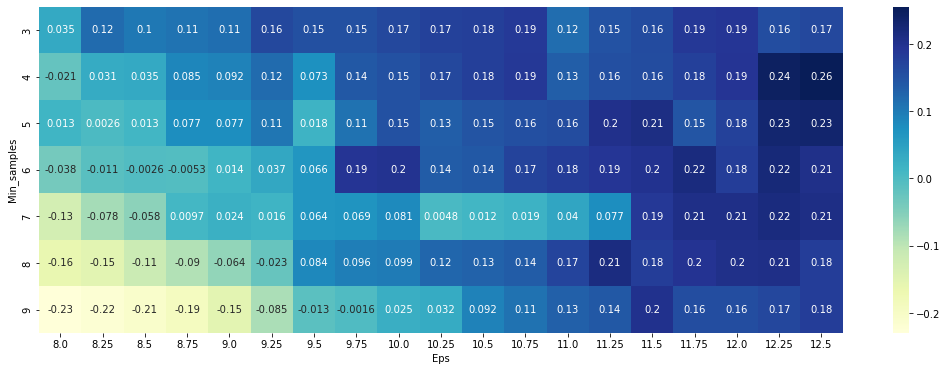

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
# append labels to points
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

- Checking sizes of clusters.

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.

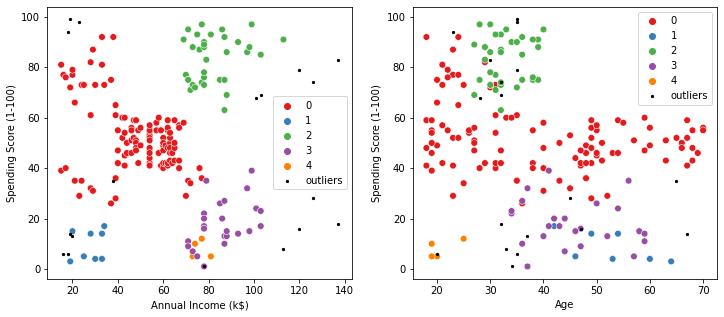

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

# Qus-9: Implementation of linear regression.

## Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.

**1. Selecting a suitable data set and performing the required preprocessing.**

In [ ]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
# Load Iris Data
iris = load_iris()

In [ ]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
target_df.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

- Renaming columns

In [ ]:
iris_df.columns = ['sepalLength','sepalWidth','petalLength','petalWidth','species']

iris dataset consists of 150 rows and 6 columns.

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
species         object
dtype: object

iris data have-
     - Numerical columns: SepalLengthCm, SepalWidthCm, PetalLengthCm,PetalWidthCm
     - Categorial columns: Species 

In [ ]:
# Number of uniquevalues in each columns
iris_df.nunique()

sepalLength    35
sepalWidth     23
petalLength    43
petalWidth     22
species         3
dtype: int64

In [ ]:
#Missing values
iris_df.isna().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

- There is no missing values in the data.

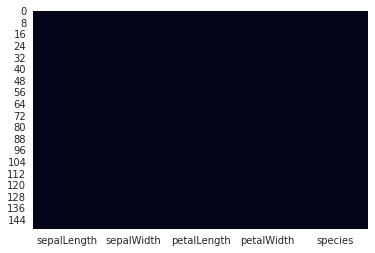

In [ ]:
### Visualizing the missing values using heatmap 
sns.heatmap(iris_df.isnull(),cbar=False)

In [ ]:
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# data["column_name"].sum()
  
sum_data = iris_df["sepalLength"].sum()
mean_data = iris_df["sepalLength"].mean()
median_data = iris_df["sepalLength"].median()
  
print("Sum:",sum_data, "\nMean:", mean_data, "\nMedian:",median_data)

Sum: 876.5 
Mean: 5.843333333333334 
Median: 5.8


In [ ]:

min_data=iris_df["sepalLength"].min()
max_data=iris_df["sepalLength"].max()
  
print("Minimum:",min_data, "\nMaximum:", max_data)

Minimum: 4.3 
Maximum: 7.9


- **Five Number Summary of data**

In [ ]:
print("Five number summary of the data")
des=iris_df.describe()
des
des.iloc[3:8,]

Five number summary of the data


,sepalLength,sepalWidth,petalLength,petalWidth
min,4.3,2.0,1.00,0.1
25%,5.1,2.8,1.60,0.3
50%,5.8,3.0,4.35,1.3
75%,6.4,3.3,5.10,1.8
max,7.9,4.4,6.90,2.5


### Data Visualization

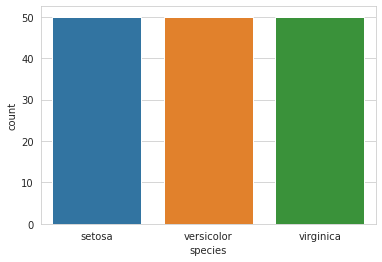

In [ ]:
sns.countplot(x='species', data=iris_df)


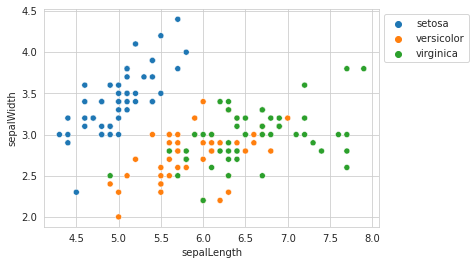

In [ ]:
sns.scatterplot(x='sepalLength', y='sepalWidth',
                hue='species', data=iris_df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

From the above plot, we can infer that – 

- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.

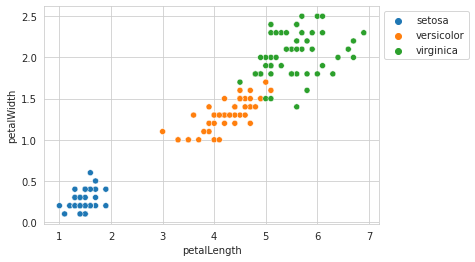

In [ ]:
sns.scatterplot(x='petalLength', y='petalWidth',
                hue='species', data=iris_df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

From the above plot, we can infer that – 

- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

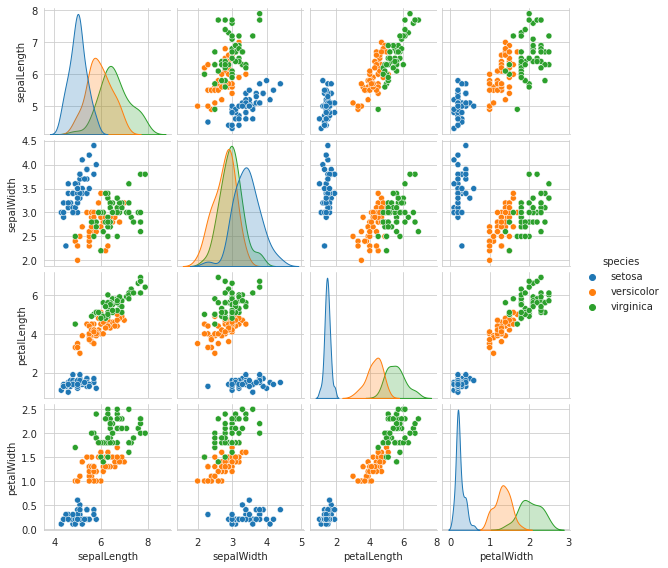

In [ ]:
sns.pairplot(iris_df, hue='species', height=2)

We can see many types of relationships from this plot such as the species Seotsa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

**Histograms**

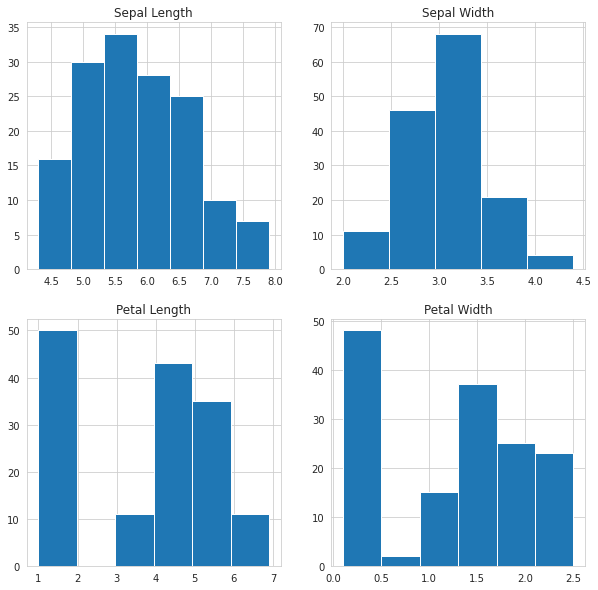

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris_df['sepalLength'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris_df['sepalWidth'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris_df['petalLength'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris_df['petalWidth'], bins=6);

From the above plot, we can see that – 

- The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
- The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
- The highest frequency of the petal length is around 50 which is between 1 and 2
- The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

#### Handling Correlation

In [ ]:
iris_df.corr(method='pearson')

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.000000,-0.117570,0.871754,0.817941
sepalWidth,-0.117570,1.000000,-0.428440,-0.366126
petalLength,0.871754,-0.428440,1.000000,0.962865
petalWidth,0.817941,-0.366126,0.962865,1.000000


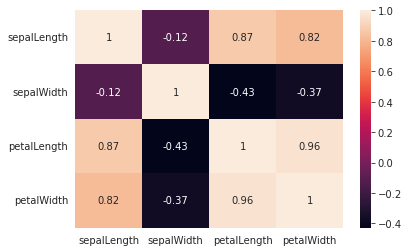

In [ ]:
sns.heatmap(iris_df.corr(method='pearson'), annot = True);
  
plt.show()

From the above graph, we can see that –

- Petal width and petal length have high correlations. 
- Petal length and sepal width have good correlations.
- Petal Width and Sepal length have good correlations.

**Box Plots**

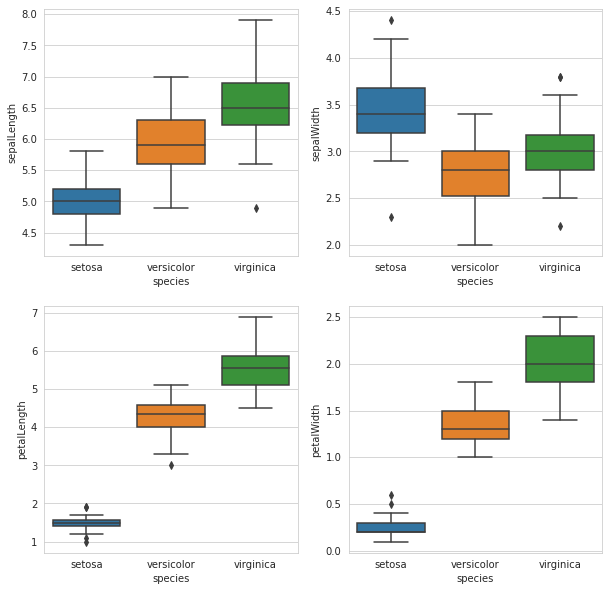

In [ ]:
def graph(y):
    sns.boxplot(x="species", y=y, data=iris_df)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepalLength')
  
plt.subplot(222)
graph('sepalWidth')
  
plt.subplot(223)
graph('petalLength')
  
plt.subplot(224)
graph('petalWidth')
  
plt.show()

From the above graph, we can see that – 

- Species Setosa has the smallest features and less distributed with some outliers.
- Species Versicolor has the average features.
- Species Virginica has the highest features

**Handling Outliers**

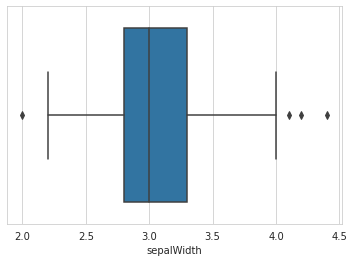

In [ ]:
sns.boxplot(x='sepalWidth', data=iris_df)

- In the above graph, the values above 4 and below 2 are acting as outliers.

Old Shape:  (150, 5)
New Shape:  (146, 5)


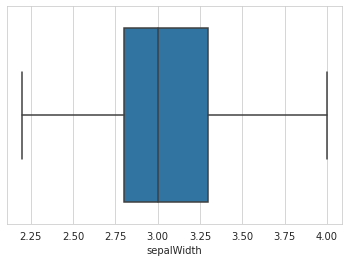

In [ ]:
# IQR
Q1 = np.percentile(iris_df['sepalWidth'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(iris_df['sepalWidth'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", iris_df.shape)
  
# Upper bound
upper = np.where(iris_df['sepalWidth'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(iris_df['sepalWidth'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
iris_df.drop(upper[0], inplace = True)
iris_df.drop(lower[0], inplace = True)
  
print("New Shape: ",iris_df.shape)
  
sns.boxplot(x='sepalWidth', data=iris_df)

### Linear Regression
- **Prediction of sepal length (cm) of the iris flowers using Linear Regression**

- Converting Objects to Numerical dtype

In [ ]:
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Variables
X_l= iris_df.drop(labels= 'sepalLength', axis= 1)
y_l= iris_df['sepalLength']
y_l

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepalLength, Length: 150, dtype: float64

In [ ]:
X_l.isna().sum()

sepalWidth     4
petalLength    4
petalWidth     4
species        0
dtype: int64

In [ ]:
X_l=X_l.dropna()

In [ ]:
y_l.isna().sum()

4

In [ ]:
y_l=y_l.dropna()

In [ ]:
# Splitting the Dataset 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_l, y_l, test_size= 0.33, random_state= 101)

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
iris_df = scaler.fit_transform(iris_df)
X_train1.head()

,sepalWidth,petalLength,petalWidth,species
106,2.5,4.5,1.7,2
78,2.9,4.5,1.5,1
40,3.5,1.3,0.3,0
42,3.2,1.3,0.2,0
90,2.6,4.4,1.2,1


In [ ]:
X_train1.isna().sum()

sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

In [ ]:
X_train1=X_train1.dropna()
y_train1=y_train1.dropna()

In [ ]:
# LinearRegression() Model
lr = LinearRegression()


In [ ]:
# Training/Fitting the Model
lr.fit(X_train1, y_train1)
lr.fit

<bound method LinearRegression.fit of LinearRegression()>

In [ ]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}
test_df = pd.DataFrame(data= d)
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.4,1.4,0.3,0


In [ ]:
X_test1=X_test1.dropna()

In [ ]:
# Making Predictions
lr.predict(X_test1)
pred = lr.predict(X_test1)
pred

array([5.61267319, 4.85521812, 4.96881093, 5.42884626, 4.63896992,
       6.03102483, 5.71233845, 6.29901344, 5.00662378, 6.44748426,
       5.89616538, 6.17268997, 6.81582579, 6.67850961, 4.66127918,
       6.04217947, 5.41365887, 6.58250564, 5.80084908, 6.88899476,
       5.92769829, 6.86914222, 5.55113698, 5.58182795, 4.94215272,
       6.35982322, 4.8184479 , 8.01567206, 6.67383679, 7.87819395,
       6.28419752, 6.47865336, 5.43581387, 5.01919251, 5.80834242,
       4.76267473, 4.96027496, 6.41732668, 6.3986787 , 4.60377572,
       4.46629761, 6.22427611, 6.47917909, 7.21851192, 6.12634114,
       5.66860828, 5.37411572, 5.09932143, 6.37882617])

In [ ]:
y_test1=y_test1.dropna()

In [ ]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test1, pred))
print('Mean Squared Error:', mean_squared_error(y_test1, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test1, pred)))

Mean Absolute Error: 0.25977826237712165
Mean Squared Error: 0.10674838509376981
Mean Root Squared Error: 0.3267237136997708


**Evaluate the model with the following metrics using cross validation:**
- a) R Square/Adjusted R Square.
- b) Mean Square Error(MSE)/Root Mean Square Error(RMSE)
- c) Mean Absolute Error(MAE)

In [ ]:
#sklearn.metrics.get_scorer_names()

In [ ]:
# k-fold CV using R Square/Adjusted R Square.
lm = LinearRegression()
np.mean(cross_val_score(lm, X_train1, y_train1, scoring='r2', cv=5))

0.7773059219671189

In [ ]:
# k-fold CV using Mean Square Error(MSE)/Root Mean Square Error(RMSE)
np.mean(-1*cross_val_score(lm, X_train1, y_train1, scoring='neg_mean_squared_error', cv=5))

0.10970147355456743

In [ ]:
# k-fold CV using Mean Absolute Error(MAE)
np.mean(-1*cross_val_score(lm, X_train1, y_train1, scoring='neg_mean_squared_error', cv=5))

0.10970147355456743

## Qus:10 - Text mining: Build classifiers for the two training sets using (1) SVM and (2) NaiveBayesMultinomial, evaluating them on the corresponding test set in each case. 


In [ ]:
df_email = pd.read_csv("emails.csv")

In [ ]:
df_email.head()

,text,spam,count
0,subject naturally irresistible corporate ident...,1,325
1,subject stock trading gunslinger fanny merrill...,1,90
2,subject unbelievable new homes made easy im wa...,1,88
3,subject 4 color printing special request addit...,1,99
4,subject money get software cds software compat...,1,53


In [ ]:
df_email.shape

(5728, 2)

In [ ]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df_email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df_email.isna().sum()

text    0
spam    0
dtype: int64

No missing values

In [ ]:
df_email['spam'].unique()

array([1, 0], dtype=int64)

In [ ]:
df_email['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

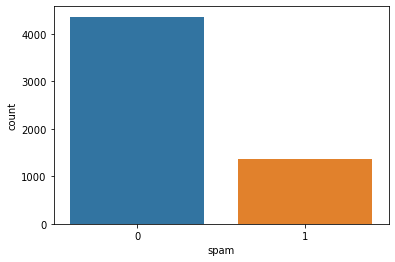

In [ ]:
sns.countplot(df_email['spam'])

- Checking the Length of email and it's relation

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mycomputer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
from nltk import word_tokenize

Function that tokenizes each and every email into words and returns it's length

In [ ]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

Applying the function to df['text'] and storing the count in another column

In [ ]:
df_email['count']=df_email['text'].apply(count_words)

In [ ]:
df_email['count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: count, Length: 5728, dtype: int64

In [ ]:
df_email.groupby('spam')['count'].mean()

spam
0    346.835321
1    267.896199
Name: count, dtype: float64

- **Text Preprocessing**

Steps for the preprocessing of the text data:
- Remove Punctuation
- Remove stopwords
- Stemming : It is a process where words are reduced to a root by removing inflection through dropping unnecessary characters,usually a suffix.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mycomputer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df_email['text']=df_email['text'].apply(process_text)

In [ ]:
df_email['text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df_email['text']=df_email['text'].apply(stemming)

In [ ]:
df_email.head()

,text,spam,count
0,subject naturally irresistible corporate ident...,1,325
1,subject stock trading gunslinger fanny merrill...,1,90
2,subject unbelievable new homes made easy im wa...,1,88
3,subject 4 color printing special request addit...,1,99
4,subject money get software cds software compat...,1,53


- **Now we will use Count Vectorizer to convert string data into Bag of Words i.e. Known Vocabulary**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df_email['text'])

In [ ]:
#print(vectorizer.get_feature_names())
#print(message_bow.toarray())

- **Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df_email['spam'],test_size=0.30)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)

Training Data Shape: (4009, 37187)
Testing Data Shape: (1719, 37187)


### Creating the Model and it's Evaluation

#### 1. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1320
           1       0.99      0.94      0.96       399

    accuracy                           0.98      1719
   macro avg       0.99      0.97      0.98      1719
weighted avg       0.98      0.98      0.98      1719



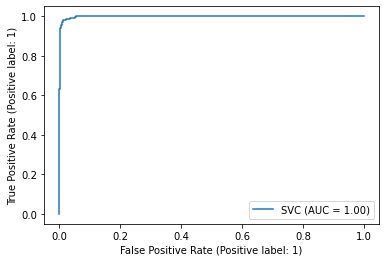

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm,X_test,y_test)

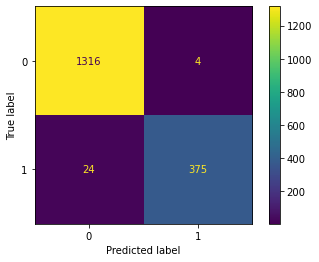

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm,X_test,y_test)

So, out of 1719 test data only 28 are misclassified. Accuracy of the model is approx 98%.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(svm,message_bow,df_email['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 97.81776751487993  %


#### 2. NaiveBayesMultinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1320
           1       0.96      0.99      0.98       399

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



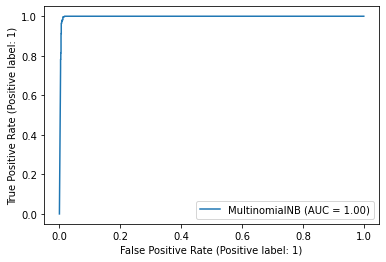

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

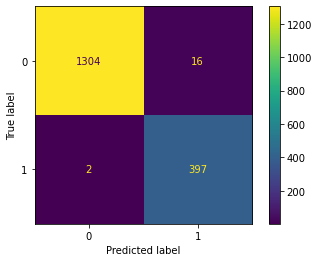

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

So, out of 1719 we have only 18 misclassification. Accuracy of the model is approx 99%. 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df_email['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 99.00491552161685  %


- **Conclusion**

  Clearly, the accuracy of Multinomial Naive Bayes model is greater than the SVM Model.Thus, Multinomial Naive Bayes algorithm   will give the better result than SVM for text Classification (or text mining).